In [1]:
from utils import *
from NeuralNetwork import *
import pandas as pd
import numpy as np
import warnings
# to ignore pandas warning
warnings.simplefilter(action='ignore', category=FutureWarning)
import matplotlib.pyplot as plt

# Training
The choice of the number of neurons and the output layer's activation function was taken making some tests on the dataset, instead the we choose **tanh** as the hidden layer's activation function because it performs very well with xavier weight initializzation as stated in the paper on **https://proceedings.mlr.press/v9/glorot10a/glorot10a.pdf**

## Monk 1


#### Variance and mean of MSE and Accuracy over 10 training instances of the model **{eta = 0.15, mb = 1, alpha (momentum) = 0.85}** 
The research of the set of hyperparameters has begun from a grid-search and it was refined with some tests choosing a set which makes the model able to yield an accuracy of 100% with low variance on MSE (test set) over different training instances

In [3]:
%%time
col_names = ["Class", "a1", "a2", "a3", "a4", "a5", "a6", "ID"]

tr_data = pd.read_csv("../monk+s+problems/monks-1.train", sep =" ",  names = col_names)
test_data = pd.read_csv("../monk+s+problems/monks-1.test", sep =" ",  names = col_names)


epochs=300
params={
    "eta" : 0.15,
    "mb" : 1,
    "momentum" : 0.85,
    "epochs" : epochs,
    "clip_value" : None,
    "hid_act_fun" : "tanh",
    "out_act_fun" : "sigmoid",
    "cost_fun" : "mse",
    "ridge_lambda":None,
    "lasso_lambda": None,
    "decay_max_steps": None,
    "decay_min_value": None
}
n=10
test_errors=np.zeros((n,epochs))
training_errors=np.zeros((n,epochs))
acc_test_errors=np.zeros((n,epochs))
acc_train_errors=np.zeros((n,epochs))
for i in range(n):
    tr = process_monk_data(tr_data)
    test = process_monk_data(test_data)
    net = NeuralNetwork()

    n_inputs = tr.shape[1] - 2

    net.add_input_layer(n_inputs)

    net.add_hidden_layer(n_inputs, 4)

    net.add_output_layer(4, 1)
    test_error,training_error,acc_test,acc_train=net.train(tr,params,test_data=test,type="monk",outFun2="accuracy")
    test_errors[i]=test_error
    training_errors[i]=training_error
    acc_test_errors[i]=acc_test
    acc_train_errors[i]=acc_train
    print(acc_test[-1])

print("Train")
print(f"MSE: mean = {np.mean(training_errors[:,-1])}, Var = {np.var(training_errors[:,-1])}")
print(f"Accuracy: mean = {np.mean(acc_train_errors[:,-1])}, Var = {np.var(acc_train_errors[:,-1])}")
print("Test")
print(f"MSE: mean = {np.mean(test_errors[:,-1])}, Var = {np.var(test_errors[:,-1])}")
print(f"Accuracy: mean = {np.mean(acc_test_errors[:,-1])}, Var = {np.var(acc_test_errors[:,-1])}")

Training:   0%|          | 0/300 [00:00<?, ?epoch/s]

Training: 100%|██████████| 300/300 [01:00<00:00,  4.92epoch/s]


1.0


Training: 100%|██████████| 300/300 [01:00<00:00,  4.97epoch/s]


1.0


Training: 100%|██████████| 300/300 [01:00<00:00,  4.96epoch/s]


1.0


Training: 100%|██████████| 300/300 [00:59<00:00,  5.06epoch/s]


0.9907407407407407


Training: 100%|██████████| 300/300 [00:59<00:00,  5.01epoch/s]


1.0


Training: 100%|██████████| 300/300 [01:00<00:00,  4.95epoch/s]


1.0


Training: 100%|██████████| 300/300 [00:59<00:00,  5.02epoch/s]


1.0


Training: 100%|██████████| 300/300 [00:59<00:00,  5.04epoch/s]


1.0


Training: 100%|██████████| 300/300 [00:59<00:00,  5.06epoch/s]


1.0


Training: 100%|██████████| 300/300 [01:00<00:00,  4.99epoch/s]

1.0
Train
MSE: mean = 2.111636366314409e-05, Var = 1.965087522688808e-12
Accuracy: mean = 1.0, Var = 0.0
Test
MSE: mean = 0.00035094396560516846, Var = 9.019428930209599e-07
Accuracy: mean = 0.999074074074074, Var = 7.716049382716119e-06
CPU times: user 10min, sys: 299 ms, total: 10min
Wall time: 10min


#### Hyperparameters = {eta = 0.15, mb = 1, alpha (momentum) = 0.85}

Training: 100%|██████████| 300/300 [01:04<00:00,  4.67epoch/s]


MSE(tr) = 3.8565343318500935e-05, MSE(test) = 5.2302186877834925e-05
Accuracy(tr) = 1.0, Accuracy(test) = 1.0


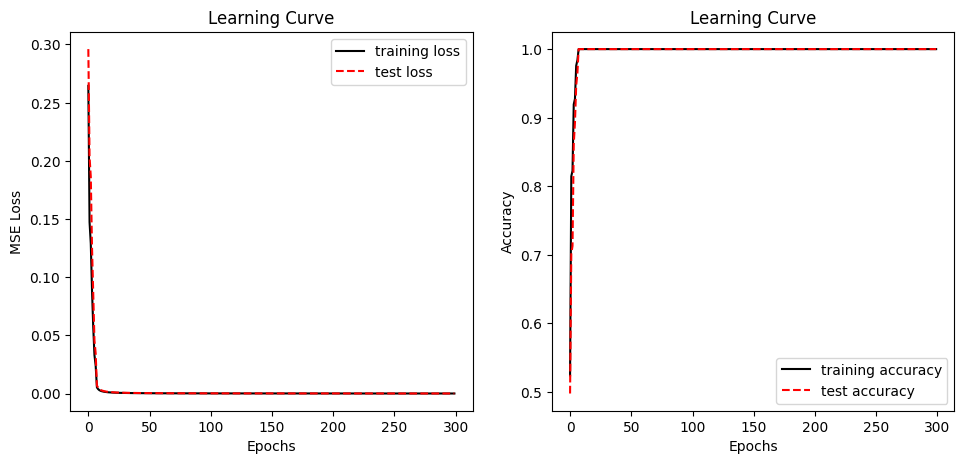

CPU times: user 1min 4s, sys: 320 ms, total: 1min 4s
Wall time: 1min 4s


In [8]:
%%time
params={
    "eta" : 0.15,
    "mb" : 1,
    "momentum" : 0.85,
    "epochs" : 300,
    "clip_value" : None,
    "hid_act_fun" : "tanh",
    "out_act_fun" : "sigmoid",
    "cost_fun" : "mse",
    "ridge_lambda":None,
    "lasso_lambda": None,
    "decay_max_steps": None,
    "decay_min_value": None
}

fig,axs = plt.subplots(1,2,figsize=(10,5))
col_names = ["Class", "a1", "a2", "a3", "a4", "a5", "a6", "ID"]

tr_data = pd.read_csv("../monk+s+problems/monks-1.train", sep =" ",  names = col_names)
test_data = pd.read_csv("../monk+s+problems/monks-1.test", sep =" ",  names = col_names)


#creazione rete
tr = process_monk_data(tr_data)
test = process_monk_data(test_data)
net = NeuralNetwork()

n_inputs = tr.shape[1] - 2
net.add_input_layer(n_inputs)
net.add_hidden_layer(n_inputs, 4)
net.add_output_layer(4, 1)

#training 
test_error,training_error,acc_test,acc_train=net.train(tr,params,test_data=test,type="monk",outFun2="accuracy")
print(f"MSE(tr) = {training_error[-1]}, MSE(test) = {test_error[-1]}")
print(f"Accuracy(tr) = {acc_train[-1]}, Accuracy(test) = {acc_test[-1]}")

plot_loss_Monk(training_error,"mse",axs[0],test_losses=test_error)
plot_loss_Monk(acc_train,"acc",axs[1],test_losses=acc_test)


fig.tight_layout(pad=2.0)
plt.show()

## Monk 2

#### Variance and mean of MSE and Accuracy over 10 training instances of the model **{eta = 0.2, mb = 1, alpha (momentum) = 0.8}** 

In [4]:
%%time
col_names = ["Class", "a1", "a2", "a3", "a4", "a5", "a6", "ID"]

tr_data = pd.read_csv("../monk+s+problems/monks-2.train", sep =" ",  names = col_names)
test_data = pd.read_csv("../monk+s+problems/monks-2.test", sep =" ",  names = col_names)


epochs=300
params={
    "eta" : 0.2,
    "mb" : 1,
    "momentum" : 0.8,
    "epochs" : epochs,
    "clip_value" : None,
    "hid_act_fun" : "tanh",
    "out_act_fun" : "sigmoid",
    "cost_fun" : "mse",
    "ridge_lambda":None,
    "lasso_lambda": None,
    "decay_max_steps": None,
    "decay_min_value": None
}
n=10
test_errors=np.zeros((n,epochs))
training_errors=np.zeros((n,epochs))
acc_test_errors=np.zeros((n,epochs))
acc_train_errors=np.zeros((n,epochs))
for i in range(n):
    tr = process_monk_data(tr_data)
    test = process_monk_data(test_data)
    net = NeuralNetwork()

    n_inputs = tr.shape[1] - 2

    net.add_input_layer(n_inputs)

    net.add_hidden_layer(n_inputs, 4)

    net.add_output_layer(4, 1)
    test_error,training_error,acc_test,acc_train=net.train(tr,params,test_data=test,type="monk",outFun2="accuracy")
    test_errors[i]=test_error
    training_errors[i]=training_error
    acc_test_errors[i]=acc_test
    acc_train_errors[i]=acc_train
    print(acc_test[-1])


print("Train")
print(f"MSE: mean = {np.mean(training_errors[:,-1])}, Var = {np.var(training_errors[:,-1])}")
print(f"Accuracy: mean = {np.mean(acc_train_errors[:,-1])}, Var = {np.var(acc_train_errors[:,-1])}")
print("Test")
print(f"MSE: mean = {np.mean(test_errors[:,-1])}, Var = {np.var(test_errors[:,-1])}")
print(f"Accuracy: mean = {np.mean(acc_test_errors[:,-1])}, Var = {np.var(acc_test_errors[:,-1])}")


Training:   0%|          | 0/300 [00:00<?, ?epoch/s]

Training: 100%|██████████| 300/300 [01:20<00:00,  3.72epoch/s]


1.0


Training: 100%|██████████| 300/300 [01:16<00:00,  3.90epoch/s]


1.0


Training: 100%|██████████| 300/300 [01:23<00:00,  3.61epoch/s]


1.0


Training: 100%|██████████| 300/300 [01:19<00:00,  3.80epoch/s]


1.0


Training: 100%|██████████| 300/300 [01:20<00:00,  3.71epoch/s]


1.0


Training: 100%|██████████| 300/300 [01:19<00:00,  3.78epoch/s]


1.0


Training: 100%|██████████| 300/300 [01:19<00:00,  3.76epoch/s]


1.0


Training: 100%|██████████| 300/300 [01:18<00:00,  3.84epoch/s]


1.0


Training: 100%|██████████| 300/300 [01:19<00:00,  3.79epoch/s]


1.0


Training: 100%|██████████| 300/300 [01:18<00:00,  3.82epoch/s]

1.0
Train
MSE: mean = 1.434007554228884e-05, Var = 2.4982785335112076e-12
Accuracy: mean = 1.0, Var = 0.0
Test
MSE: mean = 7.748510346210573e-05, Var = 2.5029459853881466e-08
Accuracy: mean = 1.0, Var = 0.0
CPU times: user 13min 15s, sys: 130 ms, total: 13min 15s
Wall time: 13min 15s


#### Hyperparameters = {eta = 0.2, mb = 1, alpha (momentum) = 0.8}

Training: 100%|██████████| 300/300 [01:32<00:00,  3.23epoch/s]


MSE(tr) = 2.9885851796806557e-05, MSE(test) = 3.686117446370653e-05
Accuracy(tr) = 1.0, Accuracy(test) = 1.0


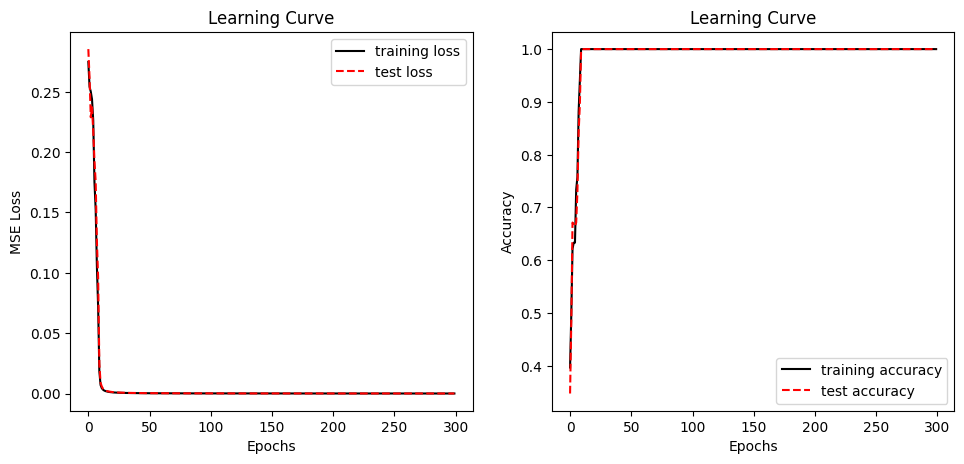

CPU times: user 1min 33s, sys: 330 ms, total: 1min 33s
Wall time: 1min 33s


In [15]:
%%time
params={
    "eta" : 0.2,
    "mb" : 1,
    "momentum" : 0.8,
    "epochs" : 300,
    "clip_value" : None,
    "hid_act_fun" : "tanh",
    "out_act_fun" : "sigmoid",
    "cost_fun" : "mse",
    "ridge_lambda":None,
    "lasso_lambda": None,
    "decay_max_steps": None,
    "decay_min_value": None
}

fig,axs = plt.subplots(1,2,figsize=(10,5))
col_names = ["Class", "a1", "a2", "a3", "a4", "a5", "a6", "ID"]

tr_data = pd.read_csv("../monk+s+problems/monks-2.train", sep =" ",  names = col_names)
test_data = pd.read_csv("../monk+s+problems/monks-2.test", sep =" ",  names = col_names)


#creazione rete
tr = process_monk_data(tr_data)
test = process_monk_data(test_data)
net = NeuralNetwork()

n_inputs = tr.shape[1] - 2
net.add_input_layer(n_inputs)
net.add_hidden_layer(n_inputs, 4)
net.add_output_layer(4, 1)

#training 
test_error,training_error,acc_test,acc_train=net.train(tr,params,test_data=test,outFun2="accuracy",type="monk")
print(f"MSE(tr) = {training_error[-1]}, MSE(test) = {test_error[-1]}")
print(f"Accuracy(tr) = {acc_train[-1]}, Accuracy(test) = {acc_test[-1]}")

plot_loss_Monk(training_error,"mse",axs[0],test_losses=test_error)
plot_loss_Monk(acc_train,"acc",axs[1],test_losses=acc_test)


fig.tight_layout(pad=2.0)
plt.show()

## Monk 3 no reg

#### Variance and mean of MSE over 10 training instances of the model **{eta = 0.003, mb = 1, alpha (momentum) = 0.7}** 


In [5]:
%%time
col_names = ["Class", "a1", "a2", "a3", "a4", "a5", "a6", "ID"]

tr_data = pd.read_csv("../monk+s+problems/monks-3.train", sep =" ",  names = col_names)
test_data = pd.read_csv("../monk+s+problems/monks-3.test", sep =" ",  names = col_names)


epochs=300
params={
    "eta" : 0.003,
    "mb" : 1,
    "momentum" : 0.7,
    "epochs" : epochs,
    "clip_value" : None,
    "hid_act_fun" : "tanh",
    "out_act_fun" : "sigmoid",
    "cost_fun" : "mse",
    "ridge_lambda":None,
    "lasso_lambda": None,
    "decay_max_steps": None,
    "decay_min_value": None
}
n=10
test_errors=np.zeros((n,epochs))
training_errors=np.zeros((n,epochs))
acc_test_errors=np.zeros((n,epochs))
acc_train_errors=np.zeros((n,epochs))
for i in range(n):
    tr = process_monk_data(tr_data)
    test = process_monk_data(test_data)
    net = NeuralNetwork()

    n_inputs = tr.shape[1] - 2

    net.add_input_layer(n_inputs)

    net.add_hidden_layer(n_inputs, 4)

    net.add_output_layer(4, 1)
    test_error,training_error,acc_test,acc_train=net.train(tr,params,test_data=test,type="monk",outFun2="accuracy")
    test_errors[i]=test_error
    training_errors[i]=training_error
    acc_test_errors[i]=acc_test
    acc_train_errors[i]=acc_train

print("Train")
print(f"MSE: mean = {np.mean(training_errors[:,-1])}, Var = {np.var(training_errors[:,-1])}")
print(f"Accuracy: mean = {np.mean(acc_train_errors[:,-1])}, Var = {np.var(acc_train_errors[:,-1])}")
print("Test")
print(f"MSE: mean = {np.mean(test_errors[:,-1])}, Var = {np.var(test_errors[:,-1])}")
print(f"Accuracy: mean = {np.mean(acc_test_errors[:,-1])}, Var = {np.var(acc_test_errors[:,-1])}")

Training:   0%|          | 0/300 [00:00<?, ?epoch/s]

Training: 100%|██████████| 300/300 [00:54<00:00,  5.53epoch/s]

Train
MSE: mean = 0.021657608077651675, Var = 7.449999263311314e-07
Accuracy: mean = 0.9508196721311476, Var = 1.232595164407831e-32
Test
MSE: mean = 0.021565577880089823, Var = 4.164351093755903e-06
Accuracy: mean = 0.9555555555555557, Var = 8.359053497942286e-06
CPU times: user 9min 30s, sys: 230 ms, total: 9min 30s
Wall time: 9min 30s


#### Hyperparameters = {eta = 0.003, mb = 1, alpha (momentum) = 0.7}

Training: 100%|██████████| 300/300 [00:57<00:00,  5.26epoch/s]


MSE(tr) = 0.02137106191067969, MSE(test) = 0.02239325872444014
Accuracy(tr) = 0.9508196721311475, Accuracy(test) = 0.9537037037037037


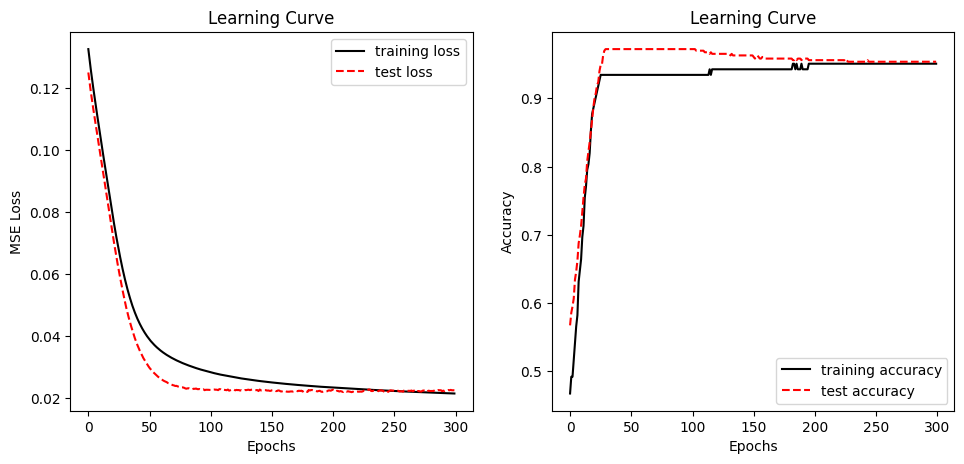

CPU times: user 57.3 s, sys: 373 ms, total: 57.7 s
Wall time: 57.4 s


In [3]:
%%time
params={
    "eta" : 0.003,
    "mb" : 1,
    "momentum" : 0.7,
    "epochs" : 300,
    "clip_value" : None,
    "hid_act_fun" : "tanh",
    "out_act_fun" : "sigmoid",
    "cost_fun" : "mse",
    "ridge_lambda":None,
    "lasso_lambda": None,
    "decay_max_steps": None,
    "decay_min_value": None
}

fig,axs = plt.subplots(1,2,figsize=(10,5))
col_names = ["Class", "a1", "a2", "a3", "a4", "a5", "a6", "ID"]

tr_data = pd.read_csv("../monk+s+problems/monks-3.train", sep =" ",  names = col_names)
test_data = pd.read_csv("../monk+s+problems/monks-3.test", sep =" ",  names = col_names)


#creazione rete
tr = process_monk_data(tr_data)
test = process_monk_data(test_data)
net = NeuralNetwork()

n_inputs = tr.shape[1] - 2
net.add_input_layer(n_inputs)
net.add_hidden_layer(n_inputs, 4)
net.add_output_layer(4, 1)

#training 
test_error,training_error,acc_test,acc_train=net.train(tr,params,test_data=test,outFun2="accuracy",type="monk")
print(f"MSE(tr) = {training_error[-1]}, MSE(test) = {test_error[-1]}")
print(f"Accuracy(tr) = {acc_train[-1]}, Accuracy(test) = {acc_test[-1]}")

plot_loss_Monk(training_error,"mse",axs[0],test_losses=test_error)
plot_loss_Monk(acc_train,"acc",axs[1],test_losses=acc_test)


fig.tight_layout(pad=2.0)
plt.show()

## Monk 3 Regularized

#### Variance and mean of MSE and Accuracy over 10 training instances of the model:
#### **{eta = 0.001, mb = 1, alpha (momentum) = 0.9, lambda (L2) = 1 * 10^-5}**


In [6]:
%%time
col_names = ["Class", "a1", "a2", "a3", "a4", "a5", "a6", "ID"]

tr_data = pd.read_csv("../monk+s+problems/monks-3.train", sep =" ",  names = col_names)
test_data = pd.read_csv("../monk+s+problems/monks-3.test", sep =" ",  names = col_names)


epochs=300
params={
    "eta" : 0.001,
    "mb" : 1,
    "momentum" : 0.9,
    "epochs" : epochs,
    "clip_value" : None,
    "hid_act_fun" : "tanh",
    "out_act_fun" : "sigmoid",
    "cost_fun" : "mse",
    "ridge_lambda":0.00001,
    "lasso_lambda": None,
    "decay_max_steps": None,
    "decay_min_value": None
}
n=10
test_errors=np.zeros((n,epochs))
training_errors=np.zeros((n,epochs))
acc_test_errors=np.zeros((n,epochs))
acc_train_errors=np.zeros((n,epochs))
for i in range(n):
    tr = process_monk_data(tr_data)
    test = process_monk_data(test_data)
    net = NeuralNetwork()

    n_inputs = tr.shape[1] - 2

    net.add_input_layer(n_inputs)

    net.add_hidden_layer(n_inputs, 4)

    net.add_output_layer(4, 1)
    test_error,training_error,acc_test,acc_train=net.train(tr,params,test_data=test,type="monk",outFun2="accuracy")
    test_errors[i]=test_error
    training_errors[i]=training_error
    acc_test_errors[i]=acc_test
    acc_train_errors[i]=acc_train

print("Train")
print(f"MSE: mean = {np.mean(training_errors[:,-1])}, Var = {np.var(training_errors[:,-1])}")
print(f"Accuracy: mean = {np.mean(acc_train_errors[:,-1])}, Var = {np.var(acc_train_errors[:,-1])}")
print("Test")
print(f"MSE: mean = {np.mean(test_errors[:,-1])}, Var = {np.var(test_errors[:,-1])}")
print(f"Accuracy: mean = {np.mean(acc_test_errors[:,-1])}, Var = {np.var(acc_test_errors[:,-1])}")

Training:   0%|          | 0/300 [00:00<?, ?epoch/s]

Training: 100%|██████████| 300/300 [00:57<00:00,  5.23epoch/s]

Train
MSE: mean = 0.05852293357622016, Var = 3.0685903934749184e-08
Accuracy: mean = 0.9344262295081969, Var = 1.232595164407831e-32
Test
MSE: mean = 0.054390962992011835, Var = 4.565995203443067e-08
Accuracy: mean = 0.9722222222222221, Var = 1.232595164407831e-32
CPU times: user 9min 45s, sys: 250 ms, total: 9min 45s
Wall time: 9min 45s


#### Hyperparameters = {eta = 0.001, mb = 1, alpha (momentum) = 0.9, lambda (L2) = 1 * 10^-5}

Training: 100%|██████████| 300/300 [00:56<00:00,  5.33epoch/s]


MSE(tr) = 0.05829758262018037, MSE(test) = 0.054170561705265186
Accuracy(tr) = 0.9344262295081968, Accuracy(test) = 0.9722222222222222


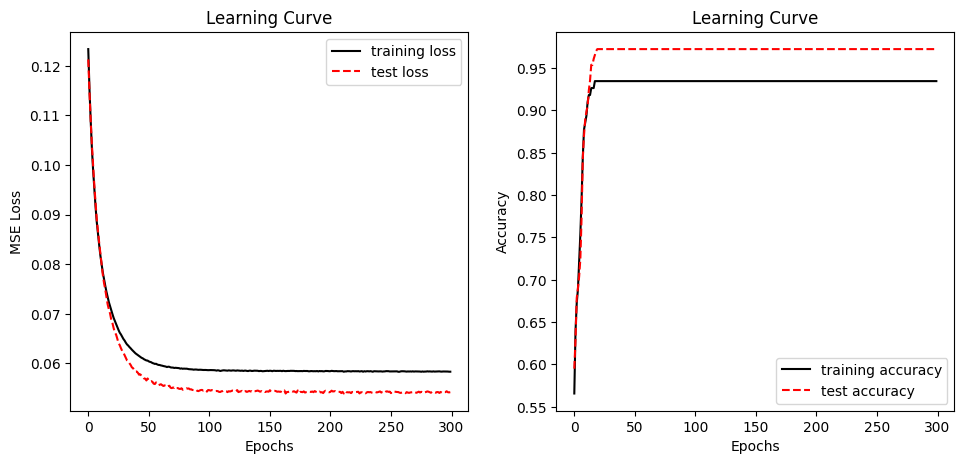

CPU times: user 56.7 s, sys: 242 ms, total: 56.9 s
Wall time: 56.7 s


In [5]:
%%time
params={
    "eta" : 0.001,
    "mb" : 1,
    "momentum" : 0.9,
    "epochs" : 300,
    "clip_value" : None,
    "hid_act_fun" : "tanh",
    "out_act_fun" : "sigmoid",
    "cost_fun" : "mse",
    "ridge_lambda":0.00001,
    "lasso_lambda": None,
    "decay_max_steps": None,
    "decay_min_value": None
}

fig,axs = plt.subplots(1,2,figsize=(10,5))
col_names = ["Class", "a1", "a2", "a3", "a4", "a5", "a6", "ID"]

tr_data = pd.read_csv("../monk+s+problems/monks-3.train", sep =" ",  names = col_names)
test_data = pd.read_csv("../monk+s+problems/monks-3.test", sep =" ",  names = col_names)


#creazione rete
tr = process_monk_data(tr_data)
test = process_monk_data(test_data)
net = NeuralNetwork()

n_inputs = tr.shape[1] - 2
net.add_input_layer(n_inputs)
net.add_hidden_layer(n_inputs, 4)
net.add_output_layer(4, 1)

#training 
test_error,training_error,acc_test,acc_train=net.train(tr,params,test_data=test,outFun2="accuracy",type="monk")
print(f"MSE(tr) = {training_error[-1]}, MSE(test) = {test_error[-1]}")
print(f"Accuracy(tr) = {acc_train[-1]}, Accuracy(test) = {acc_test[-1]}")

plot_loss_Monk(training_error,"mse",axs[0],test_losses=test_error)
plot_loss_Monk(acc_train,"acc",axs[1],test_losses=acc_test)

fig.tight_layout(pad=2.0)
plt.show()